# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**Note:** This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset 001333, titled "Parkinson's Electrophysiological Signal Dataset (PESD)". This dataset contains simulated electrophysiological signals from a cortico-basal-ganglia network. The dataset includes Local Field Potential (LFP) signals, which are in the time domain.

You can access the Dandiset on the DANDI Archive here: https://dandiarchive.org/dandiset/001333/0.250327.2220

## What this notebook covers

This notebook will demonstrate:
- How to load the Dandiset using the DANDI API.
- How to load a specific NWB file from the Dandiset.
- How to access metadata from the NWB file.
- How to access and visualize a segment of the raw LFP data.

## Required packages

To run this notebook, you need the following Python packages installed:
- dandi
- pynwb
- h5py
- remfile
- matplotlib
- numpy
- pandas

**Note:** This notebook assumes these packages are already installed and does not include installation instructions.


In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import welch

## Loading the Dandiset

First, we connect to the DANDI archive and load the specified Dandiset.


In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "0.250327.2220")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = list(dandiset.get_assets())
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)


## Loading an NWB file

We will now load a specific NWB file from the Dandiset. For this example, we will use the file `sub-healthy-simulated-lfp/sub-healthy-simulated-lfp_ses-162_ecephys.nwb`. We will access it directly using its DANDI asset URL.


In [3]:
# Define the URL for the NWB asset
nwb_url = "https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/"
asset_id = "00df5264-001b-4bb0-a987-0ddfb6058961"

# Load the NWB file
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Successfully loaded NWB file from: {nwb_url}")

# Get the LFP ElectricalSeries
lfp_series = nwb.processing['ecephys']['LFP']['LFP']

Successfully loaded NWB file from: https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Metadata

We can access various metadata from the loaded NWB file.


In [4]:
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Related Publications: {nwb.related_publications}")
print(f"Keywords: {list(nwb.keywords)}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")

Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Identifier: 2feb8ac9-a70f-49f0-894b-7420f0d803cb
Session Start Time: 2025-03-27 16:53:27.603558-04:00
Experimenter: ('Ananna Biswas',)
Related Publications: ('https://arxiv.org/abs/2407.17756', 'DOI: 10.3389/fnins.2020.00166')
Keywords: ['ecephys', 'LFP', "Parkinson's Disease", 'Beta Band']
Institution: Michigan Technological University
Lab: BrainX Lab


## NWB File Structure Overview

This NWB file contains electrophysiological data. The main data is the Local Field Potential (LFP) stored under the 'ecephys' processing module.

Here's a simplified view of the relevant structure:

```
NWBFile
└── processing
    └── ecephys (ProcessingModule)
        └── data_interfaces
            └── LFP (LFP)
                └── electrical_series
                    └── LFP (ElectricalSeries)
                        └── data (Dataset: 1D array of LFP voltage values)
                        └── electrodes (DynamicTableRegion)
```

The `electrodes` table provides information about the recording channels.


### Electrodes Information

Let's examine the electrodes table to understand the recording setup.


In [5]:
electrodes_df = nwb.electrodes.to_dataframe()
print("Electrodes Table:")
print(electrodes_df)

Electrodes Table:
                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   
5   Simulated Cortico-basal-ganglia network of brain   
6   Simulated Cortico-basal-ganglia network of brain   
7   Simulated Cortico-basal-ganglia network of brain   
8   Simulated Cortico-basal-ganglia network of brain   
9   Simulated Cortico-basal-ganglia network of brain   
10  Simulated Cortico-basal-ganglia network of brain   
11  Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.ElectrodeG

## Exploring the LFP Data

The LFP data is stored as a 1-dimensional array in the `LFP` ElectricalSeries. The `nwb-file-info` tool indicates the shape is `(77400,)`. We can check if the total number of data points is divisible by the number of electrodes to support the assumption that the data is interleaved.


In [6]:
total_data_points = lfp_series.data.shape[0]
num_electrodes = electrodes_df.shape[0]

is_divisible = total_data_points % num_electrodes == 0
print(f"Total data points ({total_data_points}) divisible by number of electrodes ({num_electrodes}): {is_divisible}")

if is_divisible:
    time_points_per_electrode = total_data_points // num_electrodes
    print(f"Assuming interleaved data: {time_points_per_electrode} time points per electrode.")

Total data points (77400) divisible by number of electrodes (12): True
Assuming interleaved data: 6450 time points per electrode.


Given that the total data points are divisible by the number of electrodes, we *assume* that the 1D data array contains interleaved samples from the 12 electrodes. This assumption allows us to reshape the data into a 2D array with shape (time points, electrodes) for analysis and visualization of individual electrodes.

The sampling rate for the LFP data is:


In [7]:
lfp_series = nwb.processing['ecephys']['LFP']['LFP']
sampling_rate = lfp_series.rate
print(f"LFP Sampling Rate: {sampling_rate} Hz")

LFP Sampling Rate: 2000.0 Hz


### Visualizing a Segment of Raw LFP Data

We will now load and plot a short segment of the raw 1D LFP data to visualize the signal. We will plot the first 1 second of data.


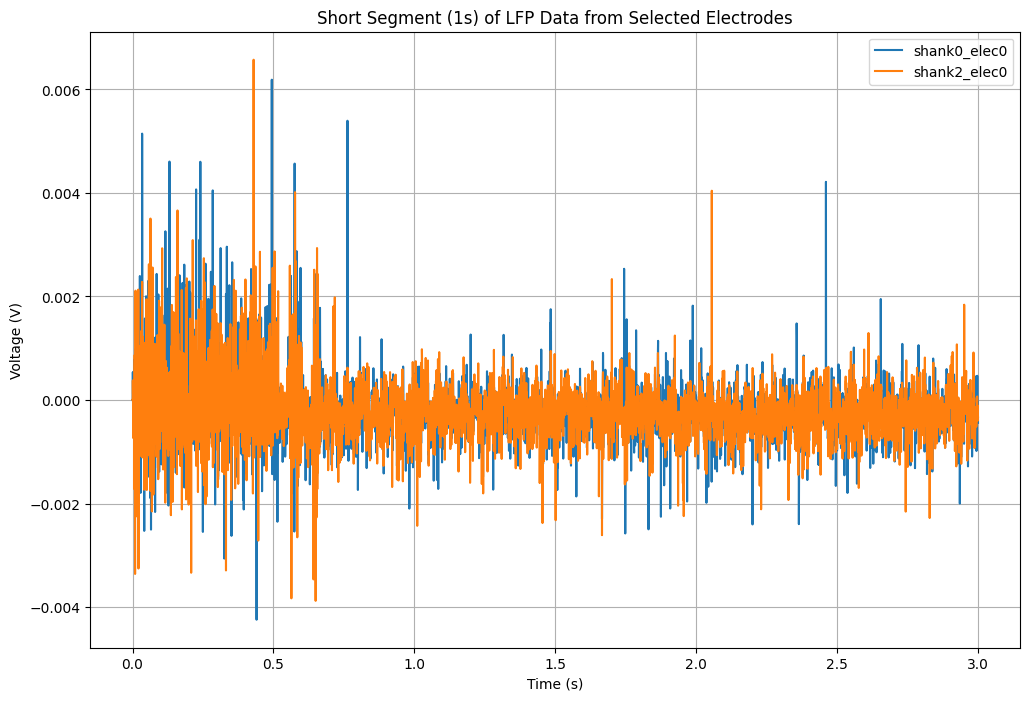

In [8]:
# Define segment to load (e.g., first 3 seconds)
start_time = 0
duration = 3 # seconds
start_index = int(start_time * sampling_rate)
end_index = int((start_time + duration) * sampling_rate)

# Load the data segment (raw 1D data)
# Assuming data is interleaved for 12 electrodes
data_segment_1d = lfp_series.data[start_index * num_electrodes : end_index * num_electrodes]

# Reshape the data segment into a 2D array (time, electrodes)
num_time_points_segment = end_index - start_index
num_electrodes = electrodes_df.shape[0]
data_segment_2d = data_segment_1d.reshape(num_time_points_segment, num_electrodes)

# Select data for two electrodes (e.g., electrode 0 and electrode 6)
electrode_indices_to_plot = [0, 6]
electrode_labels_to_plot = [electrodes_df.iloc[i]['label'] for i in electrode_indices_to_plot]

# Create a time vector for the segment
time = (np.arange(start_index, end_index) / sampling_rate) + lfp_series.starting_time

# Plot the LFP data for the selected electrodes
plt.figure(figsize=(12, 8))
for i, elec_index in enumerate(electrode_indices_to_plot):
    plt.plot(time, data_segment_2d[:, elec_index], label=electrode_labels_to_plot[i])

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Short Segment (1s) of LFP Data from Selected Electrodes')
plt.legend()
plt.grid(True)
plt.show()

### Power Spectrum Analysis

We can compute the power spectrum of the LFP data to examine its frequency content. We will compute the power spectrum for one of the electrodes (e.g., Electrode 0) using Welch's method.


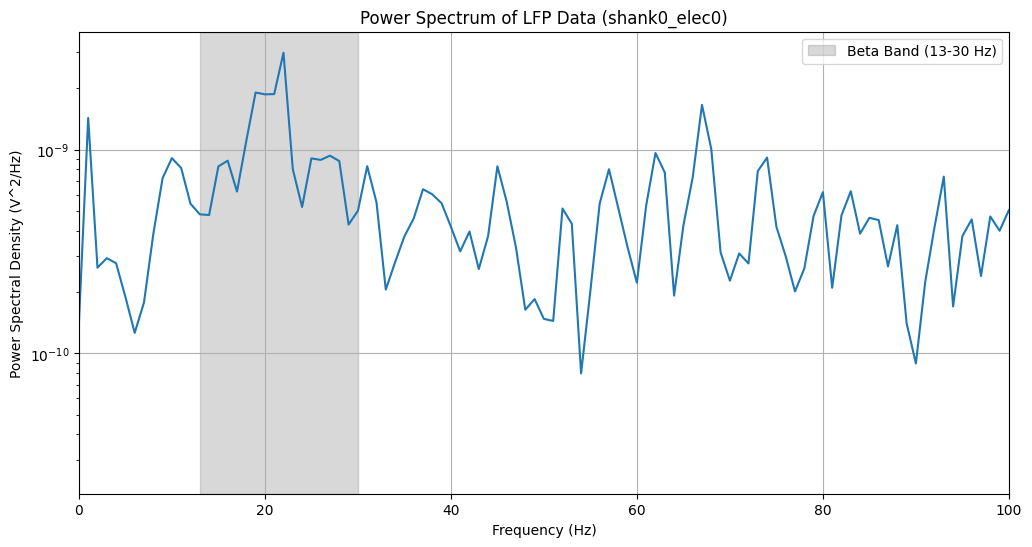

In [9]:
# Select data for one electrode (e.g., electrode 0) for spectrum analysis
electrode_index_for_spectrum = 0
electrode_data_for_spectrum = data_segment_2d[:, electrode_index_for_spectrum]

# Compute the power spectrum using Welch's method
# Using the whole segment for computation
nperseg = int(sampling_rate) # Use 1 second segments for Welch
frequencies, power_spectrum = welch(electrode_data_for_spectrum, fs=sampling_rate, nperseg=nperseg)

# Plot the power spectrum
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, power_spectrum) # Use semilogy for better visualization
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title(f'Power Spectrum of LFP Data ({electrodes_df.iloc[electrode_index_for_spectrum].label})')
plt.grid(True)
plt.xlim([0, 100]) # Limit frequency range for better visualization

# Highlight the beta band (13-30 Hz)
plt.axvspan(13, 30, color='gray', alpha=0.3, label='Beta Band (13-30 Hz)')
plt.legend()


plt.show()

The power spectrum shows the distribution of signal power across different frequencies. In this plot, we observe a prominent peak around 20 Hz, which falls within the beta frequency band (13-30 Hz). Elevated beta activity in the subthalamic nucleus (STN) is often considered a pathological biomarker in Parkinson's disease. This observation aligns with the dataset's focus on Parkinson's electrophysiological signals.

## Neurosift Link

You can explore this specific NWB file interactively using Neurosift via the following link:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/&dandisetId=001333&dandisetVersion=0.250327.2220


## Summary and Future Directions

This notebook demonstrated how to load Dandiset 001333, access an NWB file, examine its metadata and electrode information, and visualize a segment of the raw 1D LFP data.

This notebook demonstrated how to load Dandiset 001333, access an NWB file, examine its metadata and electrode information. We explored the structure of the 1D LFP data, confirming its divisibility by the number of electrodes which supports the assumption of interleaved data, allowing for reshaping into a 2D array for visualizing data from individual electrodes. We also performed frequency analysis on a segment of the LFP data, identifying a prominent peak in the beta band.

Possible future directions for analysis with this Dandiset could include:
- Investigating other NWB files in the Dandiset, particularly those that might contain the "Beta ARV" data.
- Further exploring the different sessions and subjects available in the Dandiset for comparative analysis (e.g., healthy vs. parkinsonian simulated data).
- Utilizing the related publications to gain a deeper understanding of the data structure and intended analysis methods.
- Exploring neurosift further for interactive visualization of the NWB file contents and other available data interfaces if present in other NWB files within the Dandiset.
- Implementing more advanced signal processing techniques (e.g., filtering, time-frequency analysis like spectrograms) for a deeper understanding of the LFP characteristics, especially in the beta band.

In [10]:
# Close the NWB file
io.close()